In [1]:
%load_ext autoreload
%autoreload 2
from nlp_utils import *
from data_utils import *
from KeywordExtractor import *
from gensim.models import Word2Vec
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import nltk
from nltk.corpus import wordnet


In [2]:
# WORD EMBEDDINGS
from gensim.models import Word2Vec, KeyedVectors
import gensim.downloader as api
# Download a pre-trained Word2Vec model (you can choose other models as well)
model_name = "glove-wiki-gigaword-50"

# Download and load the model (this might take a while to download)
# model = api.load(model_name)
# model.save('data/model.model')

In [7]:
joined, abstracts, titles, keywords = get_data('data/CS_papers.csv', version="CS")
print(joined[0])
print(abstracts[0])
print(titles[0])
print(keywords[0])

Deep Residual Learning for Image Recognition. Deeper neural networks are more difficult to train. We present a residual learning framework to ease the training of networks that are substantially deeper than those used previously. We explicitly reformulate the layers as learning residual functions with reference to the layer inputs, instead of learning unreferenced functions. We provide comprehensive empirical evidence showing that these residual networks are easier to optimize, and can gain accuracy from considerably increased depth. On the ImageNet dataset we evaluate residual nets with a depth of up to 152 layers - 8× deeper than VGG nets [40] but still having lower complexity. An ensemble of these residual nets achieves 3.57% error on the ImageNet test set. This result won the 1st place on the ILSVRC 2015 classification task. We also present analysis on CIFAR-10 with 100 and 1000 layers. The depth of representations is of central importance for many visual recognition tasks. Solely 

In [42]:
abstract = "The island country of Japan has developed into a great economy after World War 2. \
The Japan sea is a source of fish. Sushi is a famous fish and rice food."
tokens, sentences = prune_text(abstract)
co, index_dict = get_co(sentences, representation='matrix')
print(index_dict)
print(co)

{'famous': 0, 'sea': 1, 'fish': 2, 'great': 3, 'sushi': 4, 'island': 5, 'economy': 6, 'source': 7, 'rice': 8, 'world_war_2': 9, 'food': 10, 'country': 11, 'japan': 12}
[[0. 0. 2. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 2. 0. 0. 0. 0. 1.]
 [2. 1. 0. 0. 1. 0. 0. 1. 2. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 2. 0. 0. 1. 0. 1. 2.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 2. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
 [0. 2. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 2. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 2.]
 [0. 1. 0. 2. 0. 1. 1. 1. 0. 0. 0. 2. 0.]]


In [39]:
# abstract = load_abstract('ex1')
# #joined, abstracts, titles, keywords = get_data('data/CS_papers.csv', version="CS")
# abstracts, keywords = get_data('data/inspec_papers.csv', version="inspec")
# abstract = abstracts[0]
abstract = "The island country of Japan has developed into a great economy after World War 2. \
The Japan sea is a source of fish. Sushi is a famous fish and rice food."
#abstract = "I like deep learning. I like NLP. I enjoy flying. Japan is a developed island nation. I like Japan because it is an island. "
ke = KeywordExtractor(abstract=abstract)
print(ke.tokens)
print(ke.sentences)
print(ke.co)
ke.graph.nodes

['island', 'country', 'japan', 'great', 'economy', 'world_war_2', 'japan', 'sea', 'source', 'fish', 'sushi', 'famous', 'fish', 'rice', 'food']
[['island', 'country', 'japan', 'great', 'economy', 'world_war_2'], ['japan', 'sea', 'source', 'fish'], ['sushi', 'famous', 'fish', 'rice', 'food']]
{('country', 'island'): 1, ('island', 'japan'): 1, ('country', 'japan'): 2, ('country', 'great'): 1, ('great', 'japan'): 2, ('economy', 'japan'): 1, ('economy', 'great'): 2, ('great', 'world_war_2'): 1, ('economy', 'world_war_2'): 1, ('japan', 'sea'): 1, ('japan', 'source'): 1, ('sea', 'source'): 2, ('fish', 'sea'): 1, ('fish', 'source'): 1, ('famous', 'sushi'): 1, ('fish', 'sushi'): 1, ('famous', 'fish'): 2, ('famous', 'rice'): 1, ('fish', 'rice'): 2, ('fish', 'food'): 1, ('food', 'rice'): 1}


NodeView(('famous', 'sea', 'fish', 'great', 'sushi', 'island', 'economy', 'source', 'rice', 'world_war_2', 'food', 'country', 'japan'))

In [ ]:
from gensim.summarization import keywords

# Extract keywords using TextRank
extracted_keywords = keywords(abstract, lemmatize=True)

# Print the extracted keywords
print(extracted_keywords)

In [ ]:
import spacy
import pytextrank

# example text
text = abstract

# load a spaCy model, depending on language, scale, etc.
nlp = spacy.load("en_core_web_sm")

# add PyTextRank to the spaCy pipeline
nlp.add_pipe("textrank")
doc = nlp(text)

# examine the top-ranked phrases in the document
print(f"Ground truth {keywords[0]}")
for phrase in doc._.phrases:
    print(phrase.text)
    print(phrase.rank, phrase.count)
    print(phrase.chunks)

13
{('famous', 'sushi'): 1, ('famous', 'fish'): 2, ('famous', 'rice'): 1, ('sea', 'japan'): 1, ('sea', 'source'): 2, ('sea', 'fish'): 1, ('fish', 'source'): 1, ('fish', 'sushi'): 1, ('fish', 'rice'): 2, ('fish', 'food'): 1, ('great', 'country'): 1, ('great', 'japan'): 2, ('great', 'economy'): 2, ('great', 'world_war_2'): 1, ('island', 'country'): 1, ('island', 'japan'): 1, ('economy', 'japan'): 1, ('economy', 'world_war_2'): 1, ('source', 'japan'): 1, ('rice', 'food'): 1, ('country', 'japan'): 2}


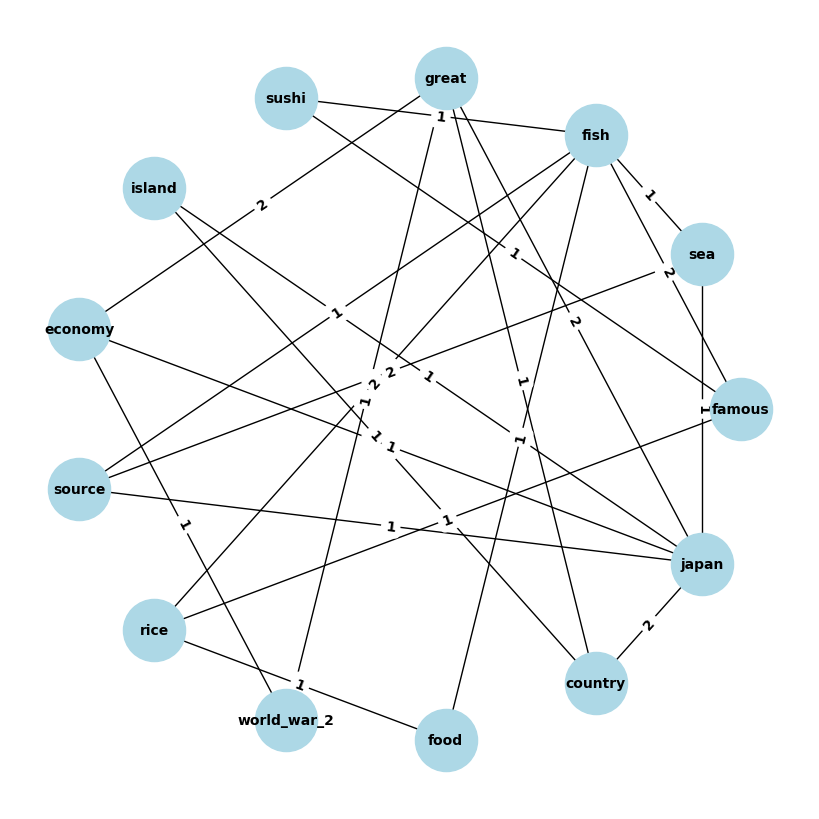

In [40]:
print(len(ke.unique_tokens))
labels = nx.get_edge_attributes(ke.graph,'weight')
# ke.add_we_weights()
# print(ke.graph.edges)
print(labels)

# ke.order_nodes()
ke.visualize_graph()

In [ ]:
print(abstracts[0])
print(keywords[0])
ke.order_nodes()

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

model = KeyedVectors.load('data/model.model')
a = get_word_em("nlp")
b = get_word_em("apple")
print(model.similarity("nlp", "apple"))
print(cosine_similarity(a.reshape(1, -1), b.reshape(1, -1))[0])
similar_words = model.similar_by_vector(a, topn=5)
print("\nWords similar to:")
for word, score in similar_words:
    print(f"{word}: {score}")

In [2]:
model = KeyedVectors.load('data/model.model')
# Find the vector representation of a word
word_vector = model["apple"]
print("Vector representation of 'apple':")
print(word_vector)

# Find similar words
similar_words = model.most_similar("apple", topn=5)
print("\nWords similar to 'apple':")
for word, score in similar_words:
    print(f"{word}: {score}")

# Perform vector arithmetic (e.g., king - man + woman = queen)
result = model.most_similar(positive=["king", "woman"], negative=["man"], topn=1)
print("\n'king' - 'man' + 'woman' =")
for word, score in result:
    print(f"{word}: {score}")

# Assuming you have already loaded a pretrained Word2Vec model
word1 = "learning"
word2 = "island"

# Calculate the similarity between two words
similarity_score = model.similarity(word1, word2)

print(f"Similarity between '{word1}' and '{word2}': {similarity_score:.2f}")


Vector representation of 'apple':
[ 0.52042  -0.8314    0.49961   1.2893    0.1151    0.057521 -1.3753
 -0.97313   0.18346   0.47672  -0.15112   0.35532   0.25912  -0.77857
  0.52181   0.47695  -1.4251    0.858     0.59821  -1.0903    0.33574
 -0.60891   0.41742   0.21569  -0.07417  -0.5822   -0.4502    0.17253
  0.16448  -0.38413   2.3283   -0.66682  -0.58181   0.74389   0.095015
 -0.47865  -0.84591   0.38704   0.23693  -1.5523    0.64802  -0.16521
 -1.4719   -0.16224   0.79857   0.97391   0.40027  -0.21912  -0.30938
  0.26581 ]

Words similar to 'apple':
blackberry: 0.7543067932128906
chips: 0.7438643574714661
iphone: 0.7429664134979248
microsoft: 0.7334205508232117
ipad: 0.7331036925315857

'king' - 'man' + 'woman' =
queen: 0.8523604273796082
Similarity between 'learning' and 'island': 0.25
